In [35]:
import numpy as np
import time
import matplotlib.pyplot
import csv

In [36]:
def convert (imgs, labels, outfile, n):
    imgf = open(imgs, "rb")
    labelf = open(labels, "rb")
    csvf = open(outfile, "w")

    imgf.read(16)
    labelf.read(8)
    images = []

    for i in range (n):
        image = [ord(labelf.read(1))]
        for j in range (28*28):
            image.append(ord(imgf.read(1)))
        images.append(image)

    for image in images:
        csvf.write(",".join(str(pix) for pix in image) + "\n")
    imgf.close()
    labelf.close()
    csvf.close()


In [37]:
mnist_train_x = "train-images.idx3-ubyte"
mnist_train_y = "train-labels.idx1-ubyte"
mnist_test_x = "t10k-images.idx3-ubyte"
mnist_test_y = "t10k-labels.idx1-ubyte"

In [38]:
convert(mnist_train_x, mnist_train_y,"train.csv", 60000)
convert(mnist_test_x, mnist_test_y,"test.csv", 10000)

In [39]:
train_file = open("train.csv", "r")
train_list = train_file.readlines()
train_file.close()
print(len(train_list))

60000


In [40]:
train_list[100]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,18,46,136,136,244,255,241,103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,94,163,253,253,253,253,238,218,204,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,131,253,253,253,253,237,200,57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,155,246,253,247,108,65,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,207,253,253,230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,157,253,253,125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,89,253,250,57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,89,253,247,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,89,253,247,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,89,253,247,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

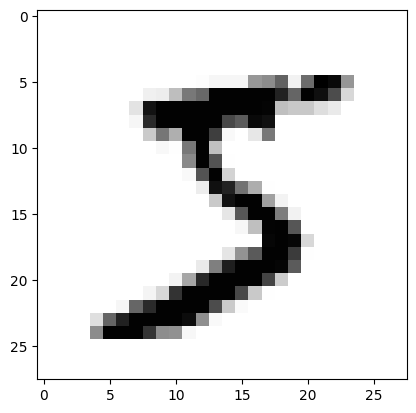

In [41]:
values = train_list[0].split(",")
image_array = np.asarray(values[1:], dtype=np.uint8).reshape(28, 28)  
matplotlib.pyplot.imshow(image_array, cmap="Greys", interpolation="None")

In [42]:
test_file = open("test.csv", "r")
test_list = test_file.readlines()
test_file.close()
print(len(test_list))

10000


In [43]:
class DNN:
    def __init__(self, sizes=[784, 128, 64, 10], epochs=10, learning_rate=0.01):
        self.sizes = sizes
        self.epochs = epochs
        self.learning_rate = learning_rate

        input_layer = sizes[0]
        hidden_1 = sizes[1]
        hidden_2 = sizes[2]
        output_layer = sizes[3]

        self.params = {
                'W1': np.random.randn(hidden_1, input_layer) * np.sqrt(1.0 / hidden_1),     # 128 * 784
                'W2': np.random.randn(hidden_2, hidden_1) * np.sqrt(1.0 / hidden_2),        # 64 * 128
                'W3': np.random.randn(output_layer, hidden_2) * np.sqrt(1.0 / output_layer) # 10 * 64
        }
        # self.weights = [np.random.randn(y, x) for x, y in zip(sizes)]

    def relu (self, x, derivative=False):
        if derivative:
            return np.where(x > 0, 1, 0)
        return np.maximum(0, x)

    def softmax(self, x, derivative=False):
        exps = np.exp(x-x.max())
        if derivative:
            return exps / np.sum(exps, axis = 0) * (1 - exps / np.sum(exps, axis = 0))
        return exps / np.sum(exps, axis = 0)
    
    def forward_pass(self, x_train):
        # This is a placeholder for the forward pass of the network
        params = self.params
        params['A0'] = x_train  # 784 * 1

        # input layer to hidden layer 1
        params['Z1'] = np.dot(params['W1'], params['A0']) # 128 * 1
        params['A1'] = self.relu(params['Z1'])

        # hidden layer 1 to hidden layer 2
        params['Z2'] = np.dot(params['W2'], params['A1']) # 64 * 1
        params['A2'] = self.relu(params['Z2'])

        # hidden layer 2 to output layer
        params['Z3'] = np.dot(params['W3'], params['A2']) # 10 * 1
        params['A3'] = self.softmax(params['Z3'])

        return params['A3']

    def backward_pass(self, y_train, output):
        # This is a placeholder for the backward pass of the network
        params = self.params
        change_w = {}

        # calculate w3 update
        error = 2 * (output - y_train) / output.shape[0] * self.softmax(params['Z3'], derivative=True)
        change_w['W3'] = np.outer(error, params['A2'])

        # calculate w2 update
        error = np.dot(params['W3'].T, error) * self.relu(params['Z2'], derivative=True)
        change_w['W2'] = np.outer(error, params['A1'])

        # calculate w1 update
        error = np.dot(params['W2'].T, error) * self.relu(params['Z1'], derivative=True)
        change_w['W1'] = np.outer(error, params['A0'])

        return change_w

    def update_weights(self, change_w, learning_rate):
        # This is a placeholder for the weight update of the network
        for key, val in change_w.items():
            self.params[key] = self.params[key] - self.learning_rate * val
  
    def compute_accuracy(self, test_data):
        # This is a placeholder for the accuracy computation of the network
        predictions = []
        for x in test_data:
                values = x.split(",")
                inputs = (np.asarray(values[1:], dtype=np.float32) / 255.0 * 0.99) + 0.01
                targets = np.zeros(10) + 0.01
                targets[int(values[0])] = 0.99
                output = self.forward_pass(inputs)
                pred = np.argmax(output)
                predictions.append(pred == np.argmax(targets))

        return np.mean(predictions)       

    def train(self, train_list, test_list):
        # This is a placeholder for the training of the network
        start_time = time.time()
        for i in range (self.epochs):
            for x in train_list:
                values = x.split(",")
                inputs = (np.asarray(values[1:], dtype=np.float32) / 255.0 * 0.99) + 0.01
                targets = np.zeros(10) + 0.01
                targets[int(values[0])] = 0.99
                output = self.forward_pass(inputs)
                change_w = self.backward_pass(targets, output)
                self.update_weights(change_w, self.learning_rate)

            accuracy = self.compute_accuracy(test_list)
            print('Epoch: {0}, Time Spent: {1:.2f}s, Accuracy: {2:.2f}%'.format(
              i+1, time.time() - start_time, accuracy * 100
          ))
            
    def export_weights_to_mem(self, base_filename="W"):
        for i, key in enumerate(['W1', 'W2', 'W3'], start=1):
            weights = self.params[key]
            mem_filename = f"{base_filename}{i}.mem"
            csv_filename = f"{base_filename}{i}.csv"

            # Write binary .mem file (32-bit IEEE 754)
            with open(mem_filename, "w") as mem_file:
                for row in weights:
                    for weight in row:
                        fp32 = np.float32(weight)
                        binary_string = format(np.frombuffer(fp32.tobytes(), dtype=np.uint32)[0], '032b')
                        mem_file.write(binary_string + "\n")

            # Write decimal .csv file
            with open(csv_filename, "w", newline='') as csv_file:
                writer = csv.writer(csv_file)
                for row in weights:
                    writer.writerow([f"{val:.8f}" for val in row])  # Up to 8 decimal places

            print(f"✅ Exported {key} to {mem_filename} (binary) and {csv_filename} (decimal)")
  

'''
W1.mem → For 128 x 784 layer
W2.mem → For 64 x 128 layer
W3.mem → For 10 x 64 layer
'''


'\nW1.mem → For 128 x 784 layer\nW2.mem → For 64 x 128 layer\nW3.mem → For 10 x 64 layer\n'

In [44]:
dnn = DNN(sizes=[784, 128, 64, 10], epochs=100, learning_rate=0.01)
dnn.train(train_list, test_list)

Epoch: 1, Time Spent: 25.69s, Accuracy: 90.68%
Epoch: 2, Time Spent: 64.91s, Accuracy: 92.88%
Epoch: 3, Time Spent: 114.75s, Accuracy: 94.01%
Epoch: 4, Time Spent: 150.12s, Accuracy: 94.70%
Epoch: 5, Time Spent: 191.82s, Accuracy: 95.08%
Epoch: 6, Time Spent: 222.51s, Accuracy: 95.42%
Epoch: 7, Time Spent: 263.14s, Accuracy: 95.69%
Epoch: 8, Time Spent: 315.58s, Accuracy: 95.86%
Epoch: 9, Time Spent: 357.34s, Accuracy: 96.02%
Epoch: 10, Time Spent: 413.53s, Accuracy: 96.14%
Epoch: 11, Time Spent: 450.68s, Accuracy: 96.24%
Epoch: 12, Time Spent: 493.28s, Accuracy: 96.29%
Epoch: 13, Time Spent: 529.07s, Accuracy: 96.29%
Epoch: 14, Time Spent: 572.85s, Accuracy: 96.28%
Epoch: 15, Time Spent: 616.16s, Accuracy: 96.31%
Epoch: 16, Time Spent: 659.40s, Accuracy: 96.29%
Epoch: 17, Time Spent: 695.38s, Accuracy: 96.22%
Epoch: 18, Time Spent: 735.21s, Accuracy: 96.18%
Epoch: 19, Time Spent: 765.73s, Accuracy: 96.17%
Epoch: 20, Time Spent: 795.24s, Accuracy: 96.18%
Epoch: 21, Time Spent: 826.50s,

In [45]:
dnn.export_weights_to_mem()

✅ Exported W1 to W1.mem (binary) and W1.csv (decimal)
✅ Exported W2 to W2.mem (binary) and W2.csv (decimal)
✅ Exported W3 to W3.mem (binary) and W3.csv (decimal)
